# Plotting contour plots of control strategies for 1D piecewise-deterministic Markov processes

### Specify example

In [1]:
example = 5

In [2]:
## Settings that are determined by example number 
if (example == 5):
    name = 'CDF_Controlled'

### Import Packages


In [3]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Polygon

## Set plotting defaults
mathtextsize = 20
plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble='\\usepackage{amsmath},\\usepackage{amssymb},\\usepackage{bm}')
plt.rc('font', family='serif', size=16)
plt.rcParams['savefig.bbox'] = 'tight'

### Read in data from file

In [4]:
## Location of C++ output
outputfolder = '../output/' + name
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolder + '_Gridsizes', 'i4')
nx = gridsize[0]
ns = gridsize[1]
n_modes = gridsize[2]

## Step sizes
config = np.fromfile(outputfolder + '_Stepsizes', fdtype)
dx = config[0]
ds = config[1]
xmin = config[2]
xmax = config[3]
smax = config[4]

X = np.linspace(xmin,xmax,nx)
S = np.linspace(0,smax,ns)

## Get data from each mode
W            = np.zeros([nx,ns,n_modes])
U            = np.zeros([nx,ns,n_modes])
cdf_controls = np.zeros([nx,ns,n_modes])
ev_controls  = np.zeros([nx,n_modes])
for j in range(n_modes):
    modename = outputfolder + str(j)
    temp1 = np.fromfile(modename + '_CDF', fdtype)
    W[:,:,j] = temp1.reshape([nx,ns])
    temp2 = np.fromfile(modename + '_CDF_Control', fdtype)
    cdf_controls[:,:,j] = temp2.reshape([nx,ns])
    temp3 = np.fromfile(modename + '_ExpectedValue', fdtype)
    U[:,:,j] = temp3.reshape([nx,ns])
    ev_controls[:,j] = np.fromfile(modename + '_EV_Control', fdtype)

In [5]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex' + str(example)
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

### Find where EV controls switch

In [6]:
switch1 = np.nonzero(ev_controls[:,0] == 1)[0][0]
switch2 = np.nonzero(ev_controls[:,1] == 1)[0][0]
x_switch1 = X[switch1] - 0.5*dx
x_switch2 = X[switch2] - 0.5*dx

# Plotting

### Create contour plot of Controls

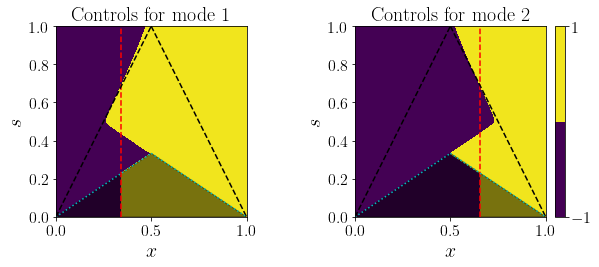

In [7]:
## Set contour levels
control_max = 1.0
control_min = -1.0
control_levels = np.linspace(control_min,control_max,3)

## Create figure
plt.close()
fig, axs = plt.subplots(1,2, figsize=[9, 4])

## Contour plots
cmap = plt.get_cmap('viridis')
im0 = axs[0].contourf(X, S, np.transpose(cdf_controls[:,:,0]), control_levels, colors=[cmap(0),cmap(250),cmap(250)])
axs[0].set_title('Controls for mode $1$', fontsize=mathtextsize)
im1 = axs[1].contourf(X, S, np.transpose(cdf_controls[:,:,1]), control_levels, colors=[cmap(0),cmap(250),cmap(250)])
axs[1].set_title('Controls for mode $2$', fontsize=mathtextsize)

## Dashed lines for switches
axs[0].plot([x_switch1,x_switch1],[0,smax],'--r')
axs[1].plot([x_switch2,x_switch2],[0,smax],'--r')

## Add lines to show worst-case cost area
axs[0].plot([0,0.5],[0,1],'--k')
axs[0].plot([0.5,1],[1,0],'--k')
axs[1].plot([0,0.5],[0,1],'--k')
axs[1].plot([0.5,1],[1,0],'--k')

## Add patches to cover mincost area
wedge1 = Polygon([[0,0],[0.5,1/3],[1,0]],alpha=0.5,color='black')
wedge2 = Polygon([[0,0],[0.5,1/3],[1,0]],alpha=0.5,color='black')
axs[0].add_patch(wedge1)
axs[1].add_patch(wedge2)

## Dashed lines for showing mincost area
axs[0].plot([0,0.5],[0,1/3],'c:')
axs[0].plot([0.5,1],[1/3,0],'c:')
axs[1].plot([0,0.5],[0,1/3],'c:')
axs[1].plot([0.5,1],[1/3,0],'c:')

## Axis labels 
axs[0].set_xlabel('$x$', fontsize=mathtextsize)
axs[0].set_ylabel('$s$', fontsize=mathtextsize)
axs[1].set_xlabel('$x$', fontsize=mathtextsize)
axs[1].set_ylabel('$s$', fontsize=mathtextsize)

## Colorbar
div0 = make_axes_locatable(axs[1])
cax0 = div0.append_axes('right', '5%', '5%')
cb0 = fig.colorbar(im1, cax = cax0, ticks=[-1,1])

axs[0].set_aspect(1)
axs[1].set_aspect(1)
plt.tight_layout()
plt.savefig(write_directory + '/' + name + '_controls.png',dpi=300)
plt.show()

### Create contour plot of CDFs

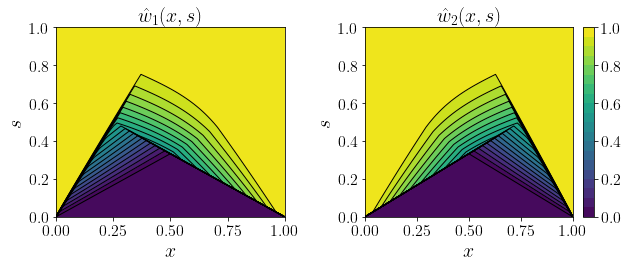

In [8]:
## Set contour levels
cdf_max = 1.0
cdf_min = 0.0
cdf_levels = np.linspace(cdf_min,cdf_max,21)

## Create figure
plt.close()
fig, axs = plt.subplots(1,2, figsize=[9, 4])

## Contour plots
im0_lines = axs[0].contour(X, S, np.transpose(W[:,:,0]), cdf_levels, linewidths=1, colors = 'k')
im0 = axs[0].contourf(X, S, np.transpose(W[:,:,0]), cdf_levels)
axs[0].set_title(r'$\hat{w}_1(x,s)$', fontsize=mathtextsize)
im1_lines = axs[1].contour(X, S, np.transpose(W[:,:,1]), cdf_levels, linewidths=1, colors = 'k')
im1 = axs[1].contourf(X, S, np.transpose(W[:,:,1]), cdf_levels)
axs[1].set_title(r'$\hat{w}_2(x,s)$', fontsize=mathtextsize)

## Axis labels 
axs[0].set_xlabel('$x$', fontsize=mathtextsize)
axs[0].set_ylabel('$s$', fontsize=mathtextsize)
axs[1].set_xlabel('$x$', fontsize=mathtextsize)
axs[1].set_ylabel('$s$', fontsize=mathtextsize)

## Colorbar
div0 = make_axes_locatable(axs[1])
cax0 = div0.append_axes('right', '5%', '5%')
cb0 = fig.colorbar(im1, cax = cax0, ticks=[0,0.2,0.4,0.6,0.8,1])

plt.tight_layout()
plt.savefig(write_directory + '/' + name + '_what.png',dpi=300)
plt.show()